### 전국 신규 민간 아파트 분양가격 동향
* 2013년부터 최근까지 부동산 가격 변동 추세를 알아봅니다
* 전혀 다른 형태의 두 데이터를 가져와 정제하고 병합하는 과정을 다루는 방법 학습합니다
* 전처리 한 결과에 대해 수치형, 범주형 데이터를 이해하고 다양한 그래프로 시각화합니다

In [1]:
import pandas as pd

In [4]:
df_last = pd.read_csv("주택도시보증공사_전국 평균 분양가격(2019년 12월).csv", 
                     encoding="cp949")
df_last.head(2)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652


In [6]:
df_first = pd.read_csv("전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv", \
                       encoding="cp949")
df_first.head(3)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795


In [7]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [8]:
# 결측치 확인
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

#### 데이터 타입 변경
분양가격이 object(문자) 타입으로 되어 있습니다. 문자열 타입을 계산할 수 없기 때문에 수치 데이터로 변경해 줍니다. 결측치가 섞여 있을 때 변환이 제대로 되지 않습니다. 그래서 pd.to_numeric 을 통해 데이터의 타입을 변경합니다.

In [10]:
df_last["분양가격"] = pd.to_numeric( df_last["분양가격(㎡)"] , errors='coerce')
df_last["분양가격"].head()

0    5841.0
1    5652.0
2    5882.0
3    5721.0
4    5879.0
Name: 분양가격, dtype: float64

In [12]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 203.3+ KB


In [13]:
type(pd.np.nan)

<ipython-input-13-e71c757bba12>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  type(pd.np.nan)


float

### 평당분양가격 구하기
* 현재 사용중인 2013년부터의 데이터는 평당분양가격 기준으로 되어 있습니다.
* 분양가격을 평당기준으로 보기위해 3.3을 곱해서 "평당분양가격" 컬럼을 만들어 추가해 줍니다.

In [14]:
df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7


In [15]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


### 규모구분을 전용면적 컬럼으로 변경
규모구분 컬럼은 전용면적에 대한 내용이 있습니다. 전용면적이라는 문구가 공통적으로 들어가고 규모구분보다는 전용면적이 좀 더 직관적이기 때문에 전용면적이라는 컬럼을 새로 만들어주고 기존 규모구분의 값에서 전용면적, 초과, 이하 등의 문구를 빼고 간결하게 만들어 봅니다.

이 때 str 의 replace 기능을 사용해서 예를들면 "전용면적 60㎡초과 85㎡이하"라면 "60㎡~85㎡" 로 변경해 줍니다.

In [16]:
# "전용면적" 삭제
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "")
# "초과" 를 "~" 로 대체
df_last["전용면적"] = df_last["전용면적"].str.replace("초과", "~")
# "이하" 삭제
df_last["전용면적"] = df_last["전용면적"].str.replace("이하", "")
# 스페이스바 하나에 해당하는 공백을 ""로 대체(삭제)
df_last["전용면적"] = df_last["전용면적"].str.replace(" ", "")  
df_last["전용면적"]

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

In [17]:
# 필요없는 컬럼을 삭제 합니다
df_last = df_last.drop(["규모구분", "분양가격(㎡)"], axis=1)
df_last.head(5)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


In [18]:
df_first.head(5)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


### groupby 로 데이터 집계하기
groupby 를 통해 데이터를 그룹화해서 연산을 해봅니다.

In [19]:
df_last.groupby(["지역명"])["평당분양가격"].mean()

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [20]:
# 전용면적으로 분양가격의 평균 계산
df_last.groupby(['전용면적'])['평당분양가격'].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [21]:
# 전용면적, 지역명 별 평당 분양가격의 평균
df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean()

전용면적   지역명
102㎡~  강원      8311.380000
       경기     14771.790000
       경남     10358.363265
       경북      9157.302000
       광주     11041.532432
                  ...     
전체     전남      7283.562000
       전북      7292.604000
       제주     10784.994000
       충남      7815.324000
       충북      7219.014000
Name: 평당분양가격, Length: 85, dtype: float64

In [23]:
df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [24]:
g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()
g.unstack().transpose().round()

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,7188.0,7163.0,7274.0,8219.0,8934.0
경기,11061.0,11685.0,12305.0,14258.0,15666.0
경남,8459.0,8497.0,8787.0,9328.0,10698.0
경북,7464.0,7753.0,8281.0,8681.0,9050.0
광주,7917.0,9191.0,9614.0,9527.0,12112.0
대구,9019.0,10282.0,12207.0,12139.0,14082.0
대전,8191.0,8911.0,9957.0,10234.0,12619.0
부산,10377.0,10744.0,11561.0,12890.0,13538.0
서울,20316.0,21753.0,21831.0,23202.0,28287.0


## pivot table 로 데이터 집계하기
* groupby 로 했던 작업을 pivot_table로 똑같이 해봅니다.

In [25]:
# 지역명 별 평균 평당분양가격
pd.pivot_table(df_last, index=["지역명"], values=["평당분양가격"], \
               aggfunc="mean").round()
# index : 그룹화할 항목의 컬럼 이름
# values : 해당 함수로 집계 또는 계산할 수치형 데이터 컬럼 이름
# aggfunc : 사용할 함수의 이름

,평당분양가격
지역명,
강원,7891.0
경기,13357.0
경남,9269.0
경북,8377.0
광주,9952.0
대구,11981.0
대전,10253.0
부산,12087.0
서울,23600.0


In [29]:
# 연도, 지역명 평당 분양 가격
p = pd.pivot_table(df_last, index=["연도", "지역명"], values="평당분양가격")
# pivot_table() 함수는 구성속성중 aggfunc 가 기본값으로 mean 이 지정되어 있습니다
# 대상 values 컬럼이 숫자 데이터 일때 적용, 문자라면 count
p.unstack().transpose().round()

연도             2015     2016     2017     2018     2019
       지역명                                             
평당분양가격 강원    7188.0   7163.0   7274.0   8219.0   8934.0
       경기   11061.0  11685.0  12305.0  14258.0  15666.0
       경남    8459.0   8497.0   8787.0   9328.0  10698.0
       경북    7464.0   7753.0   8281.0   8681.0   9050.0
       광주    7917.0   9191.0   9614.0   9527.0  12112.0
       대구    9019.0  10282.0  12207.0  12139.0  14082.0
       대전    8191.0   8911.0   9957.0  10234.0  12619.0
       부산   10377.0  10744.0  11561.0  12890.0  13538.0
       서울   20316.0  21753.0  21831.0  23202.0  28287.0
       세종    8765.0   8858.0   9133.0  10340.0  11299.0
       울산    9368.0   9583.0  10667.0  10241.0  10216.0
       인천   10976.0  11099.0  11641.0  11882.0  13250.0
       전남    6799.0   6937.0   7373.0   7930.0   8219.0
       전북    7110.0   6907.0   7399.0   8175.0   8532.0
       제주    7951.0   9567.0  12567.0  11936.0  11828.0
       충남    7690.0   7958.0   8198.0   8202.0   8749.0
       충북    6829.0   7133.0   7473.0   8149.0   7971.0

#### 시각화 

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus = False )
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<AxesSubplot:xlabel='지역명'>

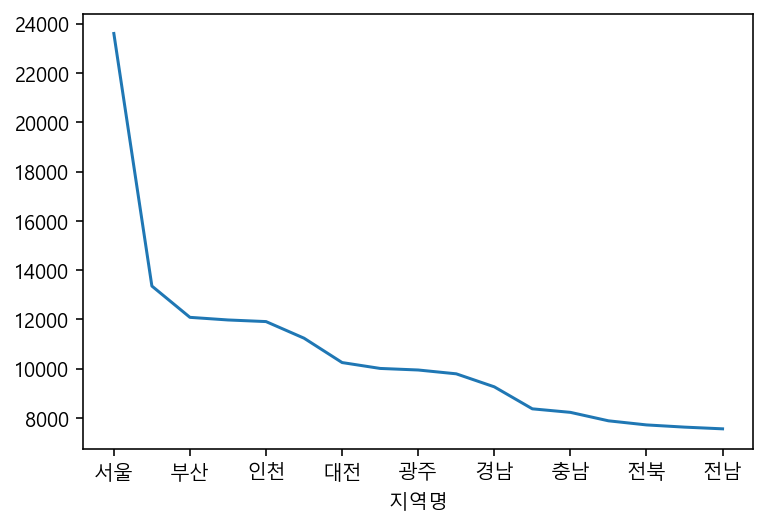

In [31]:
# 지역명으로 분양가격의 평균을 구하고 선그래프로 시각화 합니다.
g = df_last.groupby(["지역명"])["평당분양가격"].mean().\
                                                sort_values(ascending=False)
g.plot()
# 차트의 종류를 지정하지 않으면 기본 그래프(line chart)가 생성됩니다

<AxesSubplot:xlabel='지역명'>

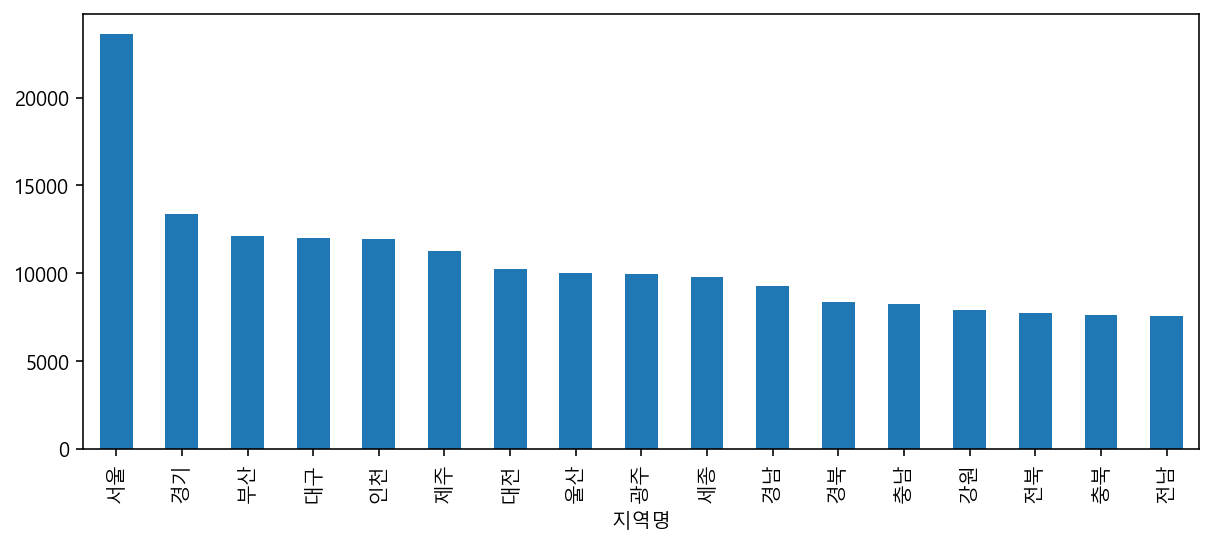

In [32]:
g.plot.bar(figsize=(10, 4))

### box-and-whisker plot | diagram
* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그립니다
* 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미합니다

1. 최대값
1. 제 3사분위수
1. 제 2사분위수( ), 즉 중앙값
1. 제 1 사분위 수( )
1. 최소값

In [33]:
df_last.pivot_table(index="월", columns="연도", values="평당분양가격")

연도,2015,2016,2017,2018,2019
월,,,,,
1,NaN,9334.029630,10095.132143,10719.148000,11535.540789
2,NaN,9361.440000,10110.885714,10766.668000,11574.793421
3,NaN,9423.276923,10107.428571,10905.488000,11610.094737
4,NaN,9601.993902,10217.232143,10920.728571,11777.876000
5,NaN,9602.396341,10358.819277,11087.485714,11976.394737
6,NaN,9676.042683,10431.618072,10921.928571,12401.884000
7,NaN,9700.551220,10549.536585,10868.376316,12424.852000
8,NaN,9719.023171,10564.869512,10811.147368,12523.896000
9,NaN,9737.656098,10583.601266,10915.257692,12527.571429


<AxesSubplot:>

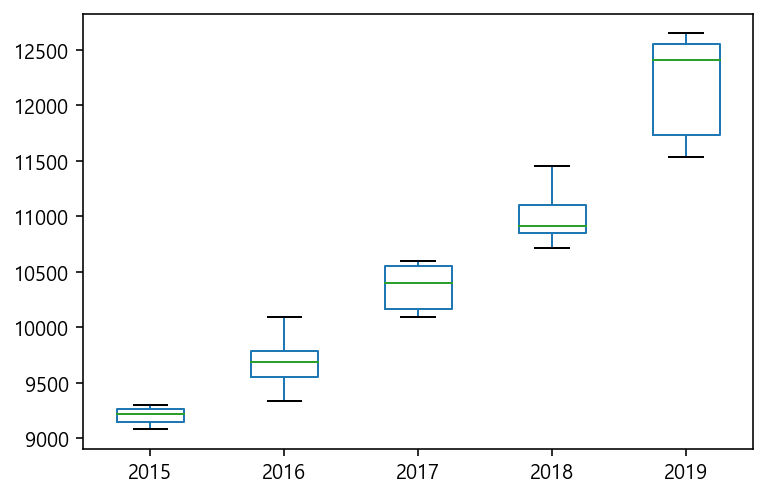

In [34]:
df_last.pivot_table(index="월", columns="연도", values="평당분양가격").plot.box()

<AxesSubplot:>

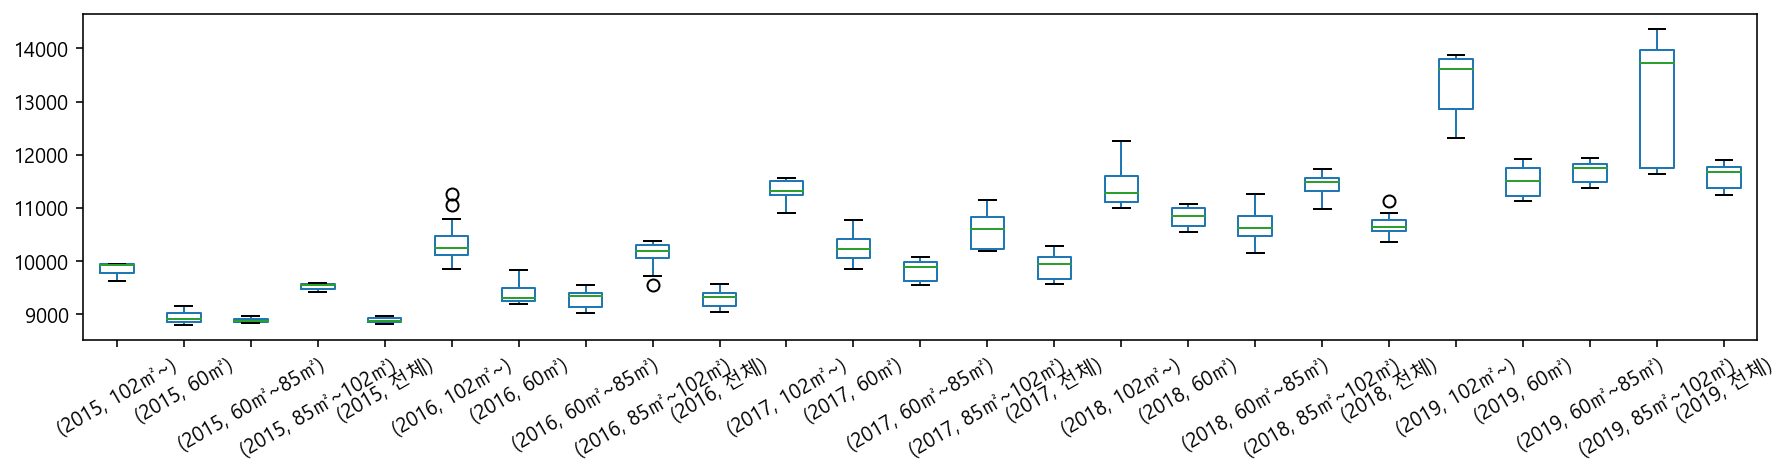

In [35]:
p = df_last.pivot_table(index="월", columns=["연도", "전용면적"], \
                        values="평당분양가격")
p.plot.box(figsize=(15, 3), rot=30)   #rot : x 라벨 기울임 정도

### Seaborn 시각화

In [ ]:
import seaborn as sns
sns.barplot(data=df_last, x="연도", y="평당분양가격", ci=None)

In [ ]:
sns.catplot(data=df_last, x="연도", y="평당분양가격", kind="bar", \
            col="지역명", col_wrap=4, ci=None)

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_last, x="연도", y="평당분양가격",  hue="지역명", ci=None)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)

In [ ]:
sns.relplot(data=df_last, x="연도", y="평당분양가격", hue="지역명", \
            kind="line", col="지역명", col_wrap=3, ci=None)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

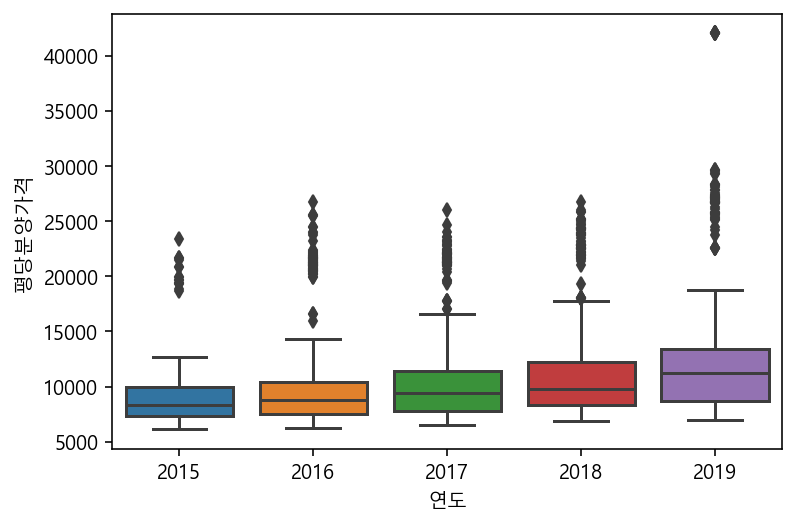

In [42]:
sns.boxplot(data=df_last, x="연도", y="평당분양가격")
# seaborn 에서 제공되는 boxplot 에서 matplot 에서 제공되는, boxplot 값들과 
# 이상치에 대한 값들이 추가로 표시됩니다
# 최소값보다 사분위수 범위 값(3사분위값-1사분위값)에 해당하는 값을 초과하는 값 

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

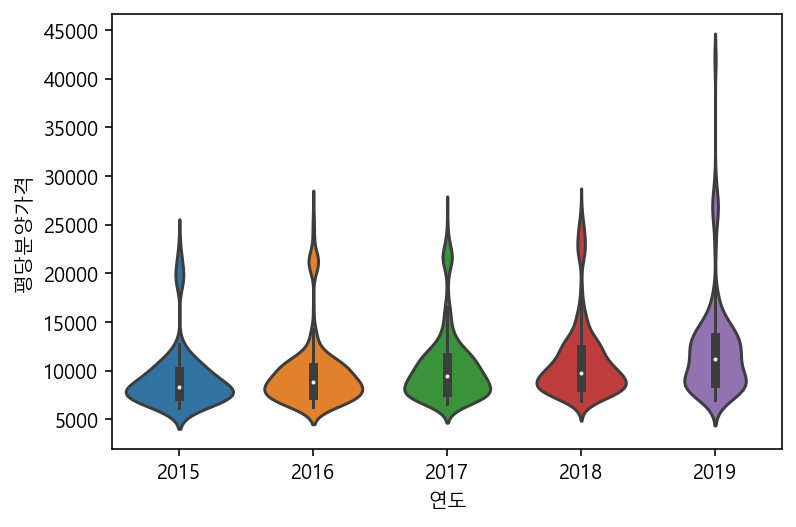

In [43]:
# violinplot : boxplot 에 데이터에 대한 분포량까지 표시하는 내용이 포함된 
# 차트이고, 바이올린 모양으로 생겼다고 해서 이음이 바이올린플랏으로 불리워집니다
sns.violinplot(data=df_last, x="연도", y="평당분양가격")

## 2015년 8월 이전 데이터 보기

In [44]:
pd.options.display.max_columns = 25
df_first.head(3)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795


In [45]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

### Unstack() 의 반대 방향 변형 함수  Melt()
* pandas 의 melt 를 이용하여 unstack() 반대방향 변형을 할수 있습니다. 각 컬럼의 이름으로 존재하는 데이터들을 행으로 변형하여 조합 또는 어울림의 관계로 배치 합니다.

In [50]:
# pd.melt 를 사용하며, df_first_melt 변수에 담습니다. 
df_first_melt = df_first.melt(id_vars="지역", var_name="기간", \
                              value_name="평당분양가격")
df_first_melt.head(1)

,지역,기간,평당분양가격
0,서울,2013년12월,18189


In [47]:
df_last.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


In [52]:
df_first_melt.columns = ["지역명", "기간", "평당분양가격"]
df_first_melt.head(1)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189


In [55]:
date = "2013년12월"
# split 을 통해 "년"을 기준으로 텍스트를 분리해 봅니다.
date.split("년")

['2013', '12월']

In [56]:
# 리스트의 인덱싱을 사용하여 연도만 추출
int(date.split("년")[0])

2013

In [57]:
# 리스트의 인덱싱과 replace를 사용해서 월을 제거합니다.
int( date.split("년")[-1].replace("월", "")  )

12

In [62]:
def parse_year(date):
    year = int( date.split("년")[0] )
    return year

df_first_melt["연도"] = df_first_melt["기간"].apply(parse_year)

In [61]:
df_first_melt["연도"] = df_first_melt["기간"].apply( \
                            lambda x : int( x.split("년")[0] ) )

In [63]:
df_first_melt["월"] = df_first_melt["기간"].apply( \
            lambda x : int(x.split("년")[-1].replace("월", "")))

In [64]:
df_first_melt.tail(3)

,지역명,기간,평당분양가격,연도,월
354,경북,2015년8월,7037,2015,8
355,경남,2015년8월,7665,2015,8
356,제주,2015년8월,7343,2015,8
